# Visualizing AmpTools production coefficients
This notebook is for a GlueX note, particularly focused on the various ambiguities that arise in phase difference calculations

Lets define a couple useful functions

In [1]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

plt.style.use('analysis/scripts/pwa_plotter.mplstyle')
plt.rcParams['figure.dpi'] = 200

# Function to calculate the angle of a vector using atan2, which takes into account the quadrant
def vector_angle(v):
    return np.arctan2(np.imag(v), np.real(v))

def draw_arc(start_angle: float, end_angle: float, start_color: str, end_color:str, radius: float, label: str, x_offset=0, y_offset=0):
    """Draw counterclockwise arc with label between two vectors with gradient color

    Args:
        start_angle (float): first angle to start arc at
        end_angle (float): second angle to finish the arc
        start_color (str): color at the start of the arc
        end_color (str): color at the end of the arc
        radius (float): how far to offset the arc from the origin
        label (str): text to display in the middle of the arc, typically the angle value
        x_offset (int, optional): fine tune x-text position. Defaults to 0.
        y_offset (int, optional): fine tune y-text position. Defaults to 0.
    """
    # Ensure the arc is drawn counterclockwise
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    theta = np.linspace(start_angle, end_angle, 100)
    arc = radius * np.exp(1j * theta)
    points = np.array([np.real(arc), np.imag(arc)]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a gradient color map
    cmap = LinearSegmentedColormap.from_list("arc_gradient", [start_color, end_color])
    norm = plt.Normalize(0, 1)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(np.linspace(0, 1, len(segments)))
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    # Add label
    mid_angle = (start_angle + end_angle) / 2
    mid_point = radius * np.exp(1j * mid_angle)
    plt.text(np.real(mid_point) + x_offset, np.imag(mid_point) + y_offset, label, color='black', fontsize=14, ha='center')

Now lets draw three example vectors with their angles

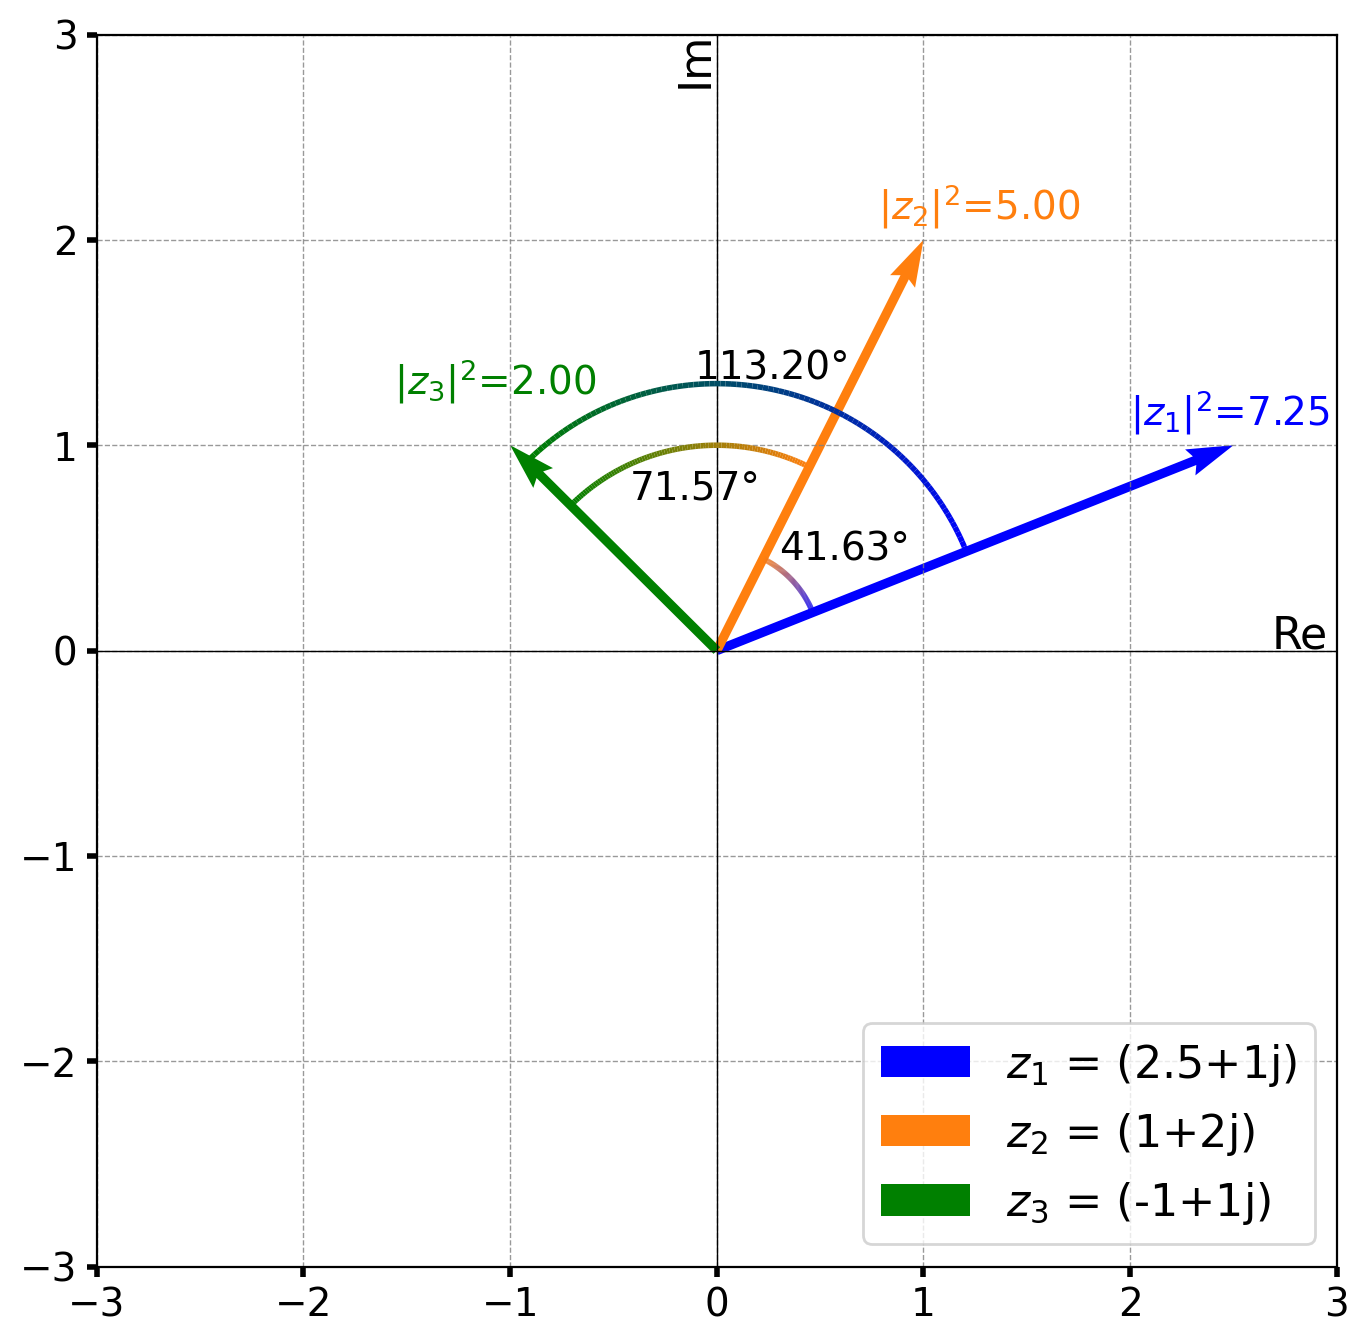

In [2]:
# Define the complex numbers (vectors)
z1 = 2.5 + 1j
z2 = 1 + 2j
z3 = -1 + 1j

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) + -0.5, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.22, np.imag(z2) + 0.1, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.56, np.imag(z3) + 0.25, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=0.25, y_offset=0.1)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=0.055, y_offset=-0.25)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=0.01, y_offset=0.05)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()

Now draw the same set of angles, but rotated

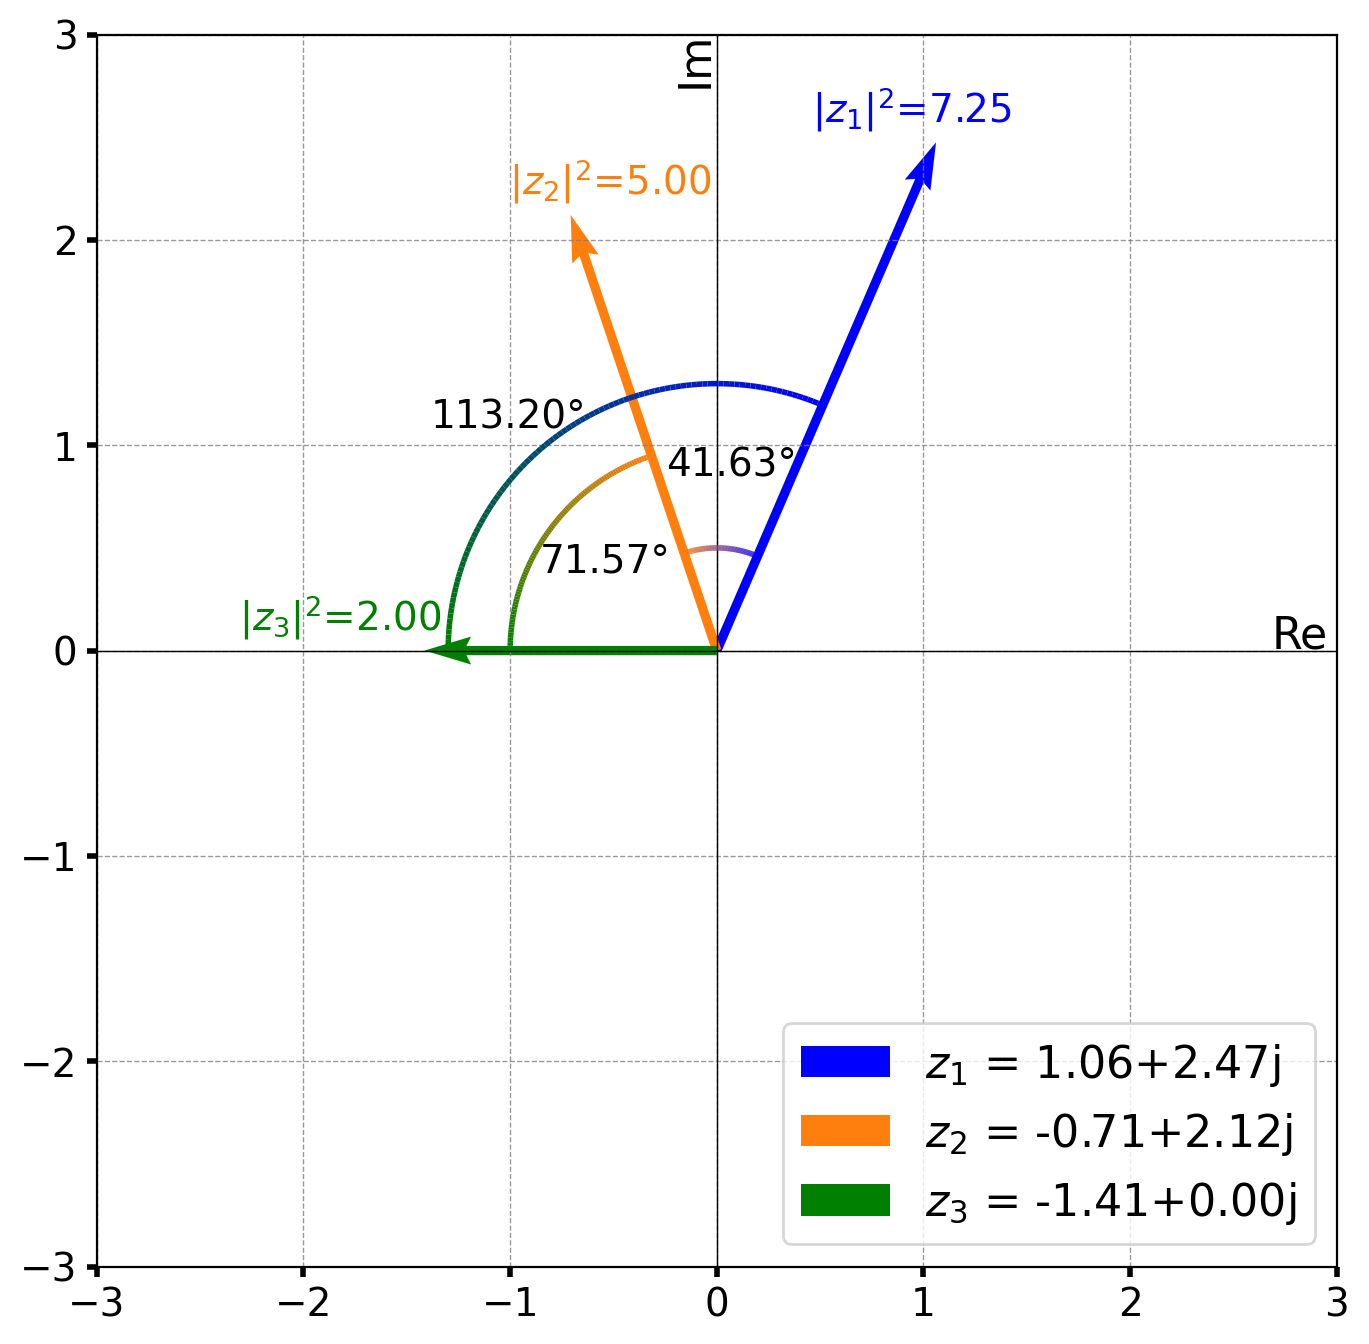

In [3]:
# Define the original complex numbers (vectors)
z1 = 2.5 + 1j
z2 = 1 + 2j
z3 = -1 + 1j

# Define the rotation angle (in radians)
rotation_angle = np.pi / 4  # Rotate by 45 degrees

# Rotate the vectors
rotation_factor = np.exp(1j * rotation_angle)
z1 *= rotation_factor
z2 *= rotation_factor
z3 *= rotation_factor

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1:.2f}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2:.2f}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3:.2f}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) - 0.6, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.3, np.imag(z2) + 0.1, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.9, np.imag(z3) + 0.1, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=0.05, y_offset=0.35)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=0.27, y_offset=-0.2)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=-0.29, y_offset=0.)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()

## Setting a reference wave
Same plots as before, now just setting one wave to be the reference

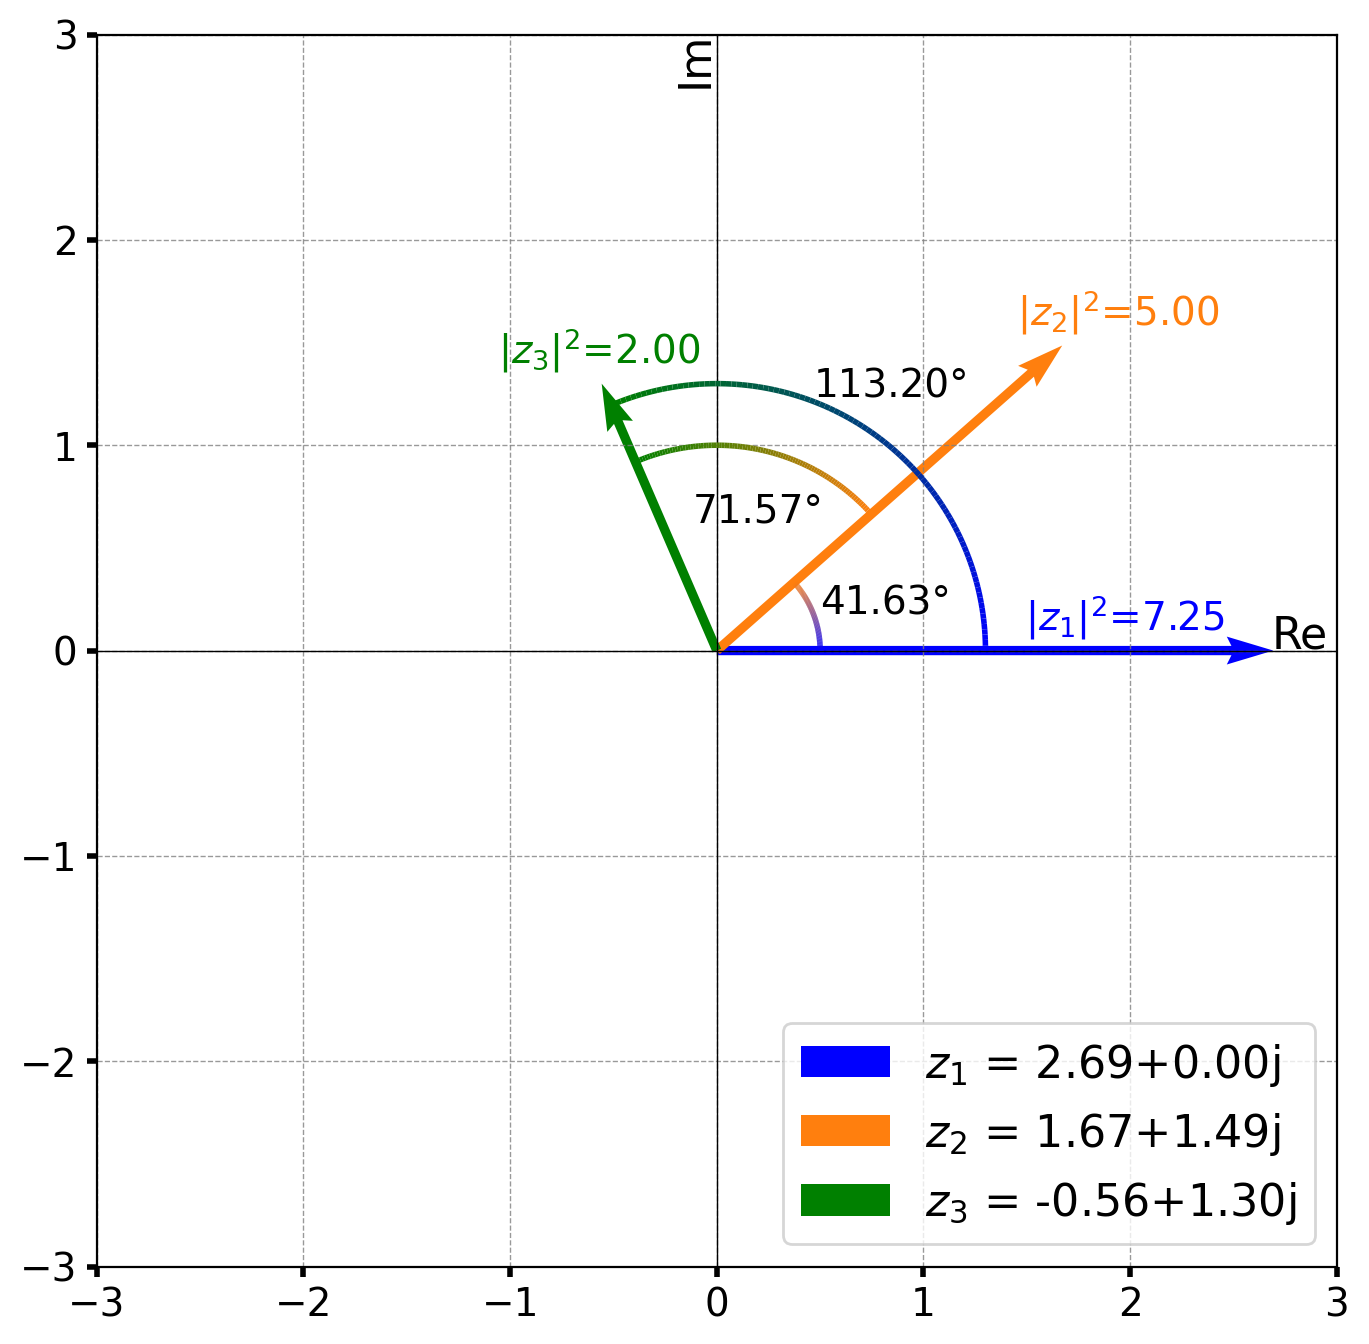

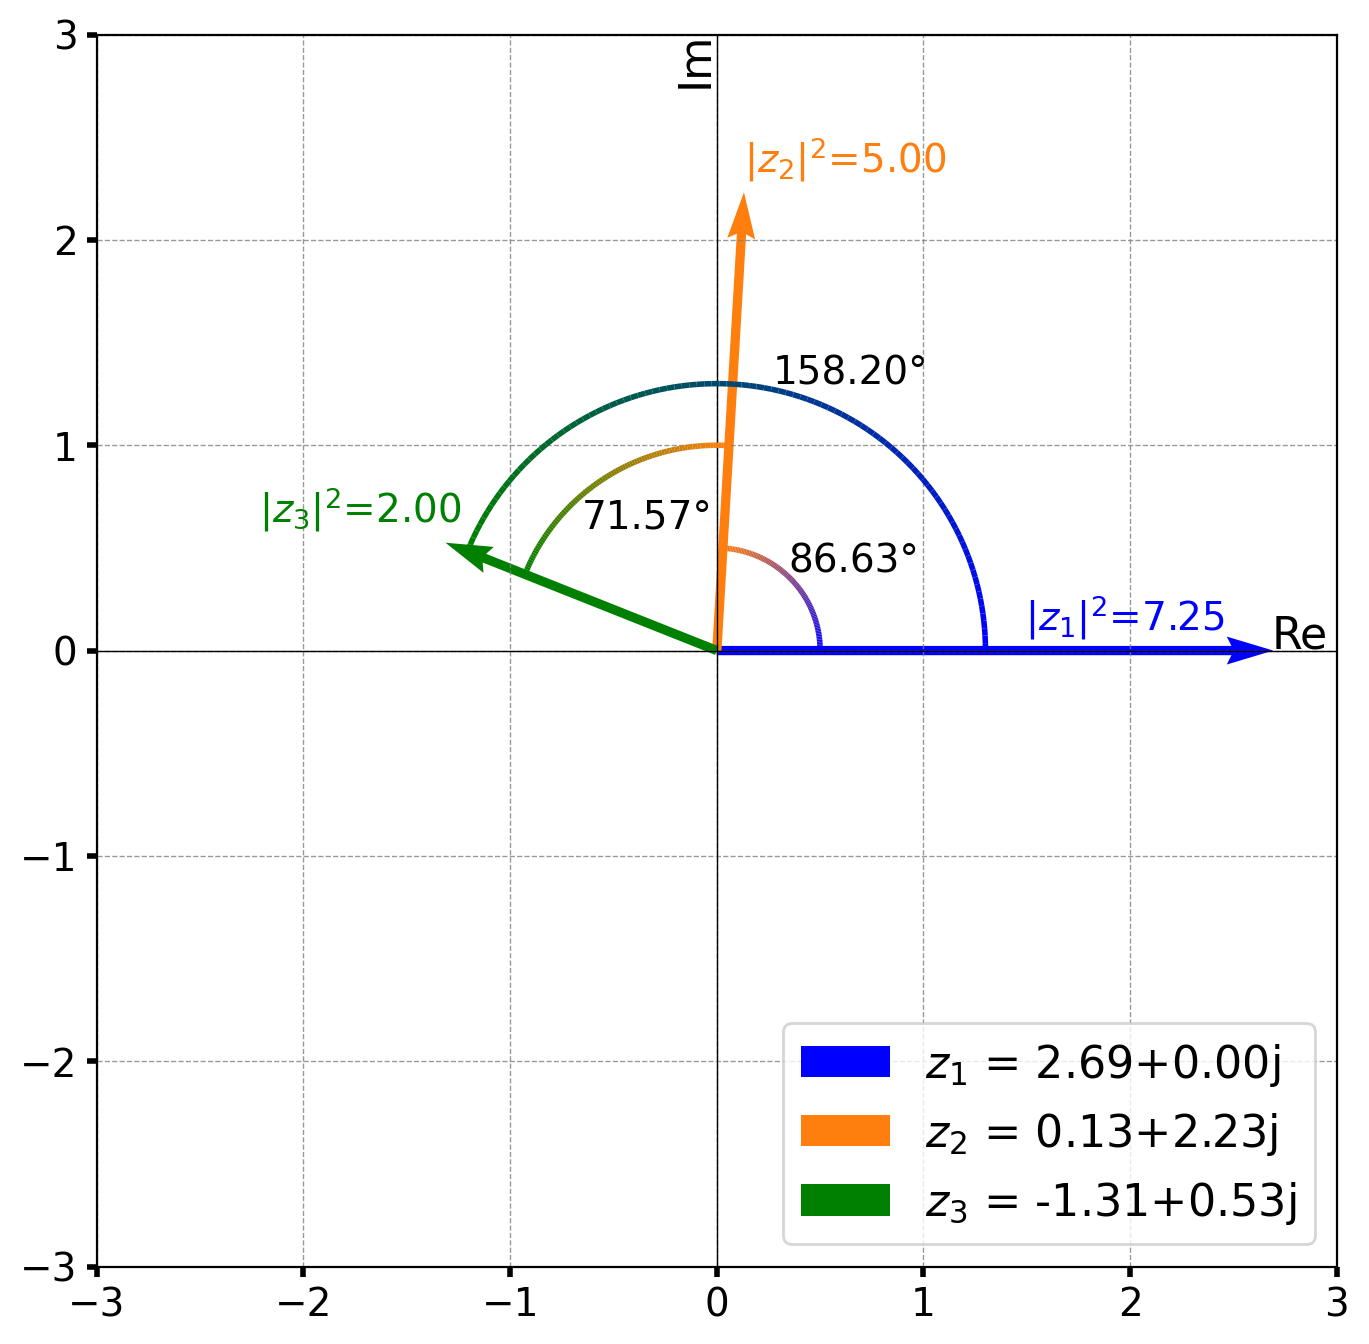

In [4]:
# Define the complex numbers (vectors)
z1 = np.sqrt(7.25) + 0j
z2 = 1 + 2j
z3 = -1 + 1j

# apply rotation factor to match original phase differences, but now with reference wave
rotation_angle = -np.arctan2(1, 2.5)
rotation_factor = np.exp(1j * rotation_angle)
z2 *= rotation_factor
z3 *= rotation_factor

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1:.2f}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2:.2f}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3:.2f}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) - 1.2, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.22, np.imag(z2) + 0.1, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.5, np.imag(z3) + 0.1, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=0.35, y_offset=0.0)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=-0.02, y_offset=-0.35)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=0.13, y_offset=0.15)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()

# rotate angles as we did before
rotation_angle = np.pi / 4  # Rotate by 45 degrees

# Rotate the vectors
rotation_factor = np.exp(1j * rotation_angle)
z2 *= rotation_factor
z3 *= rotation_factor

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1:.2f}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2:.2f}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3:.2f}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) - 1.2, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.0, np.imag(z2) + 0.1, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.9, np.imag(z3) + 0.1, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=0.3, y_offset=0.04)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=0.2, y_offset=-0.25)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=0.4, y_offset=0.02)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()


The $\pi$ flip ambiguity: we can rotate our numbers by pi and get the same result, so long as the reference wave is just real, and not necessarily positive

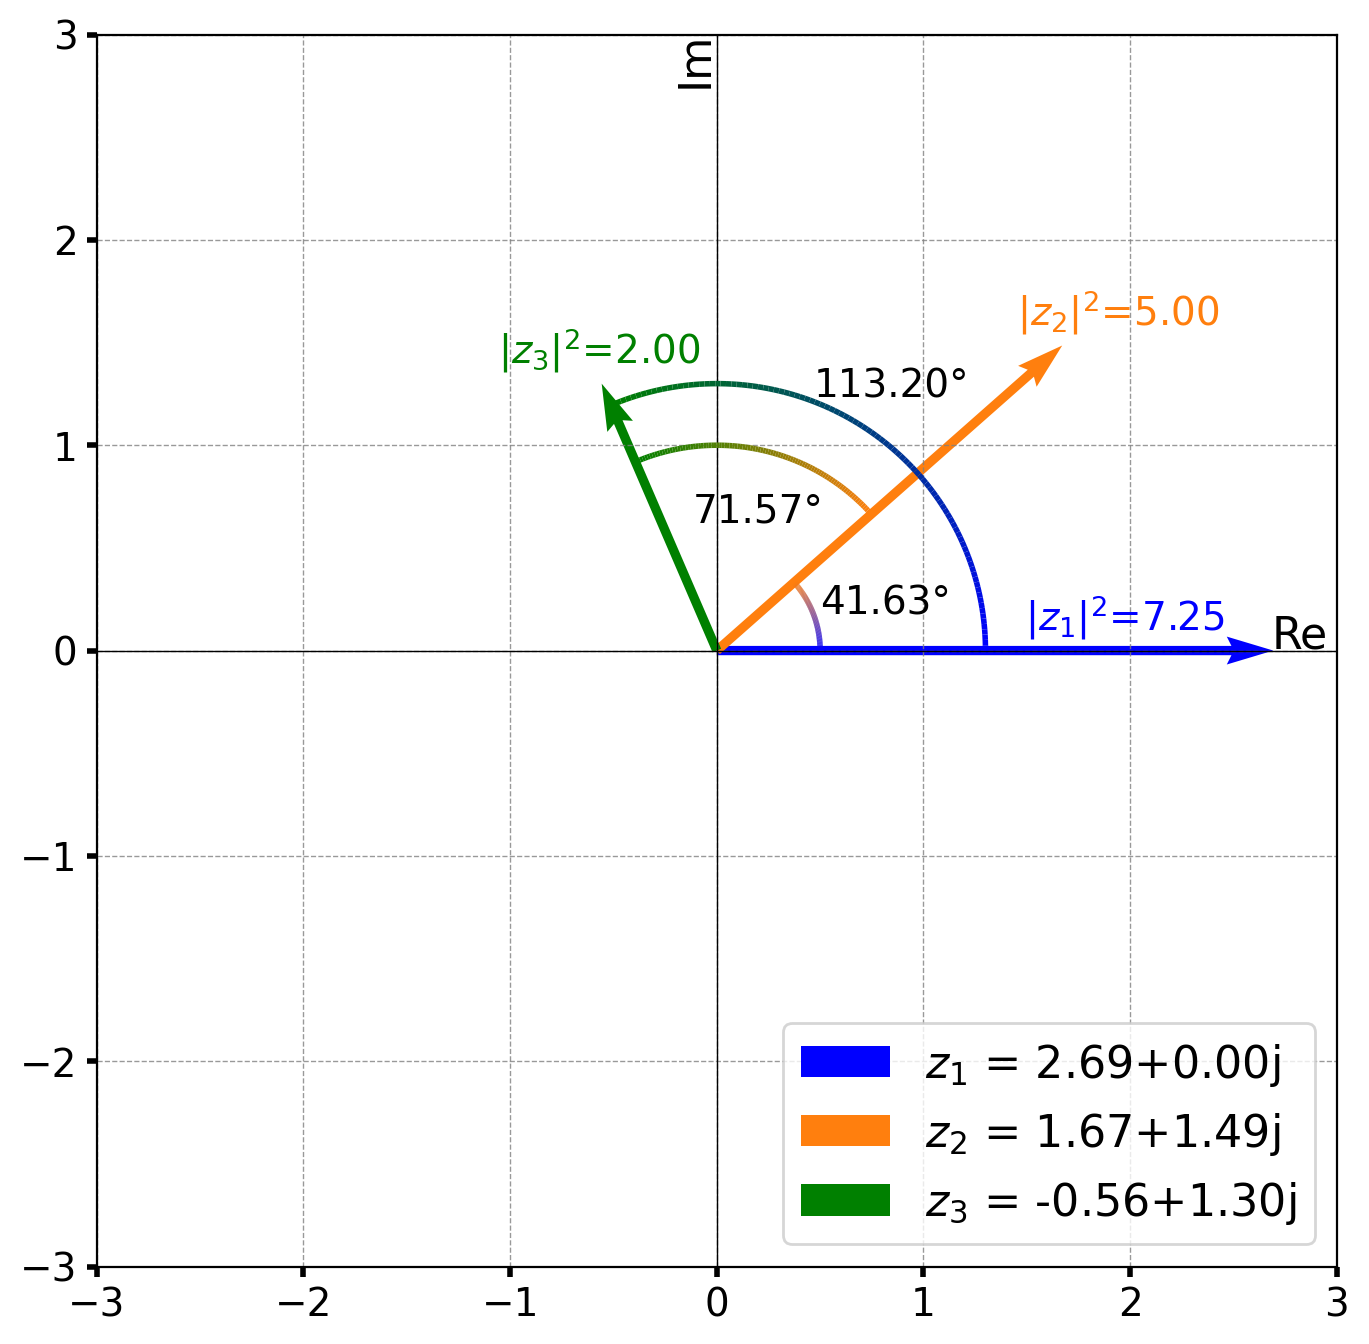

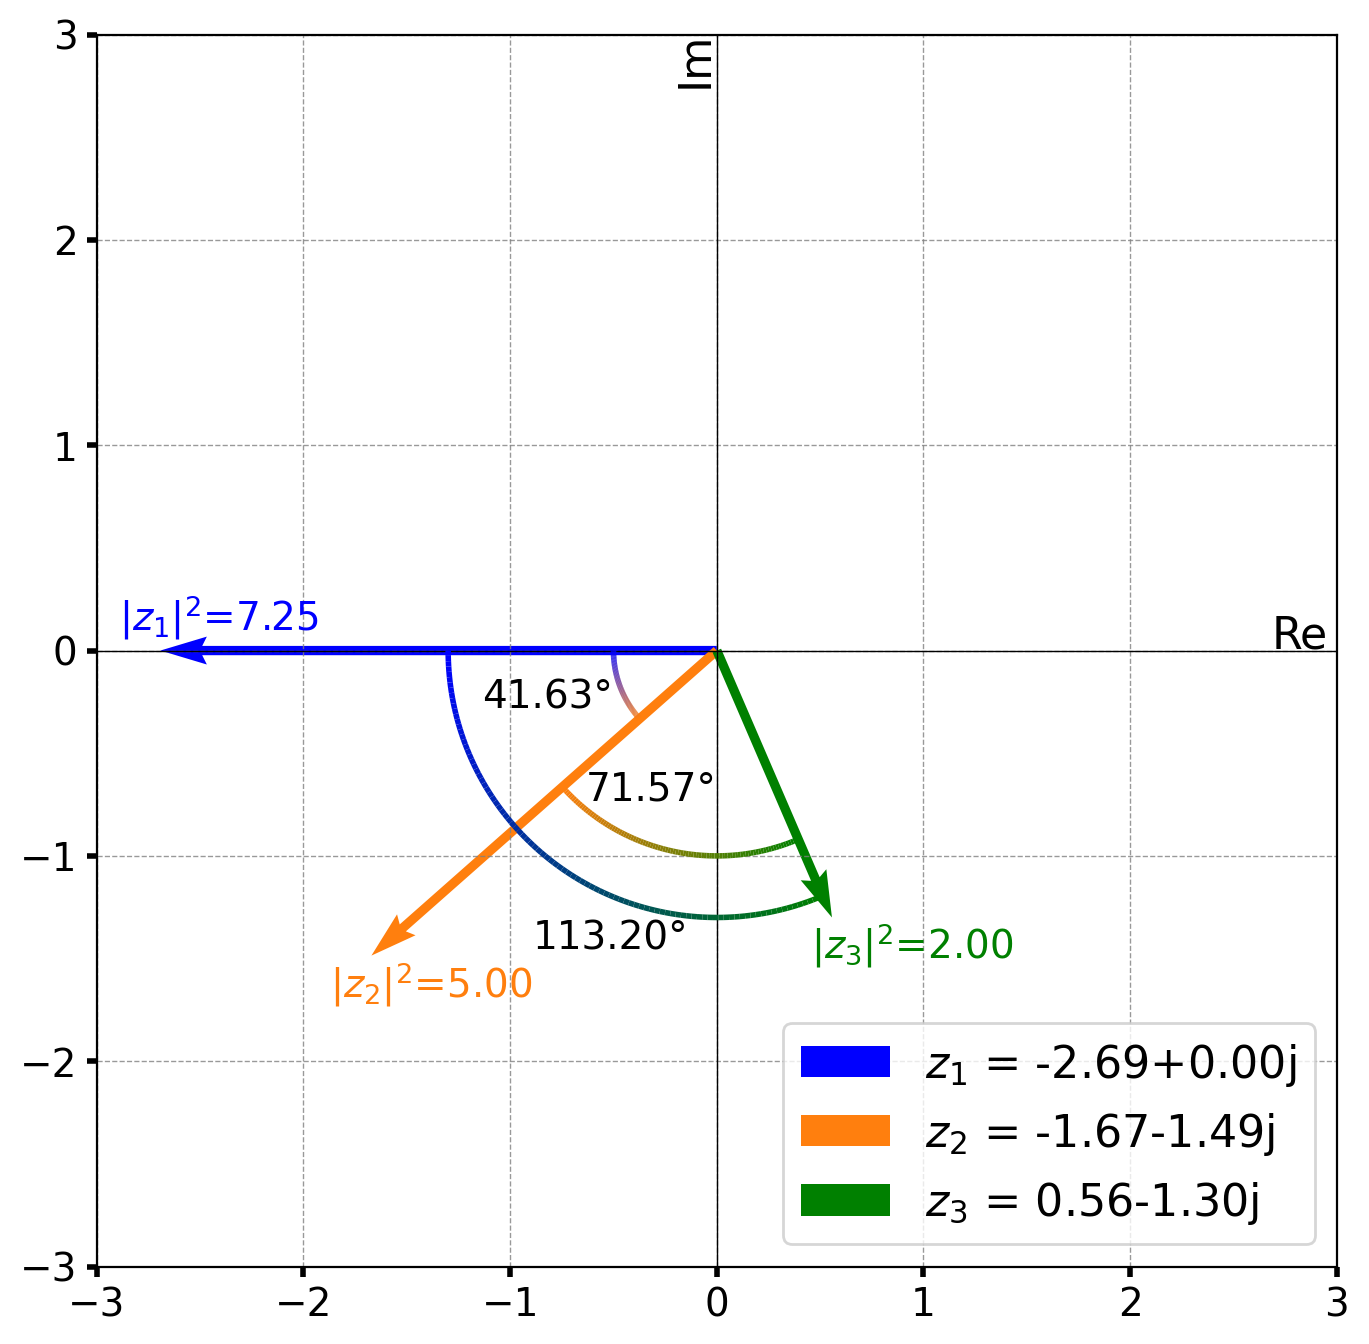

In [5]:
# Define the complex numbers (vectors)
z1 = np.sqrt(7.25) + 0j
z2 = 1 + 2j
z3 = -1 + 1j

# apply rotation factor to match original phase differences, but now with reference wave
rotation_angle = -np.arctan2(1, 2.5)
rotation_factor = np.exp(1j * rotation_angle)
z2 *= rotation_factor
z3 *= rotation_factor

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1:.2f}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2:.2f}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3:.2f}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) - 1.2, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.22, np.imag(z2) + 0.1, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.5, np.imag(z3) + 0.1, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=0.35, y_offset=0.0)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=-0.02, y_offset=-0.35)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=0.13, y_offset=0.15)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()

# rotate angles as we did before
rotation_angle = np.pi # Rotate by 180 degrees

# Rotate the vectors
rotation_factor = np.exp(1j * rotation_angle)
z1 *= rotation_factor
z2 *= rotation_factor
z3 *= rotation_factor

# Calculate magnitudes of the vectors
magnitude2_z1 = np.square(np.abs(z1))
magnitude2_z2 = np.square(np.abs(z2))
magnitude2_z3 = np.square(np.abs(z3))

# Calculate angles of the vectors using atan2
angle_z1 = vector_angle(z1)
angle_z2 = vector_angle(z2)
angle_z3 = vector_angle(z3)

# Calculate angles between the vectors
angle_12 = np.degrees((angle_z2 - angle_z1) % (2 * np.pi))
angle_23 = np.degrees((angle_z3 - angle_z2) % (2 * np.pi))
angle_13 = np.degrees((angle_z3 - angle_z1) % (2 * np.pi))

# Plot the Argand diagram
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot the vectors
plt.quiver(0, 0, np.real(z1), np.imag(z1), angles='xy', scale_units='xy', scale=1, color='blue', label=rf'$z_1$ = {z1:.2f}')
plt.quiver(0, 0, np.real(z2), np.imag(z2), angles='xy', scale_units='xy', scale=1, color='#ff7f0e', label=rf'$z_2$ = {z2:.2f}')
plt.quiver(0, 0, np.real(z3), np.imag(z3), angles='xy', scale_units='xy', scale=1, color='green', label=rf'$z_3$ = {z3:.2f}')

# Annotate magnitudes at the endpoints
plt.text(np.real(z1) - 0.2, np.imag(z1) + 0.1, rf'$|z_1|^2$={magnitude2_z1:.2f}', color='blue', fontsize=14)
plt.text(np.real(z2) - 0.2, np.imag(z2) - 0.2, rf'$|z_2|^2$={magnitude2_z2:.2f}', color='#ff7f0e', fontsize=14)
plt.text(np.real(z3) - 0.1, np.imag(z3) - 0.2, rf'$|z_3|^2$={magnitude2_z3:.2f}', color='green', fontsize=14)

# Draw arcs and annotate the angles
draw_arc(angle_z1, angle_z2, "blue", "#ff7f0e", radius=0.5, label=f'{angle_12:.2f}°', x_offset=-0.35, y_offset=-0.1)
draw_arc(angle_z2, angle_z3, "#ff7f0e", "green", radius=1.0, label=f'{angle_23:.2f}°', x_offset=-0.1, y_offset=0.25)
draw_arc(angle_z1, angle_z3, "blue", "green", radius=1.3, label=f'{angle_13:.2f}°', x_offset=0.2, y_offset=-0.37)

# Set plot limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Add legend and title
plt.legend(loc="lower right")
plt.xlabel("Re", labelpad=20)
plt.ylabel("Im", labelpad=20)
plt.gca().xaxis.set_label_coords(0.97, 0.53)
plt.gca().yaxis.set_label_coords(0.5, 0.98)

# Show the plot
plt.show()

# Phase Plots
Some example phase plots to demonstrate different ideas in the note

First we'll make an example plot of picking 4 different phase motions

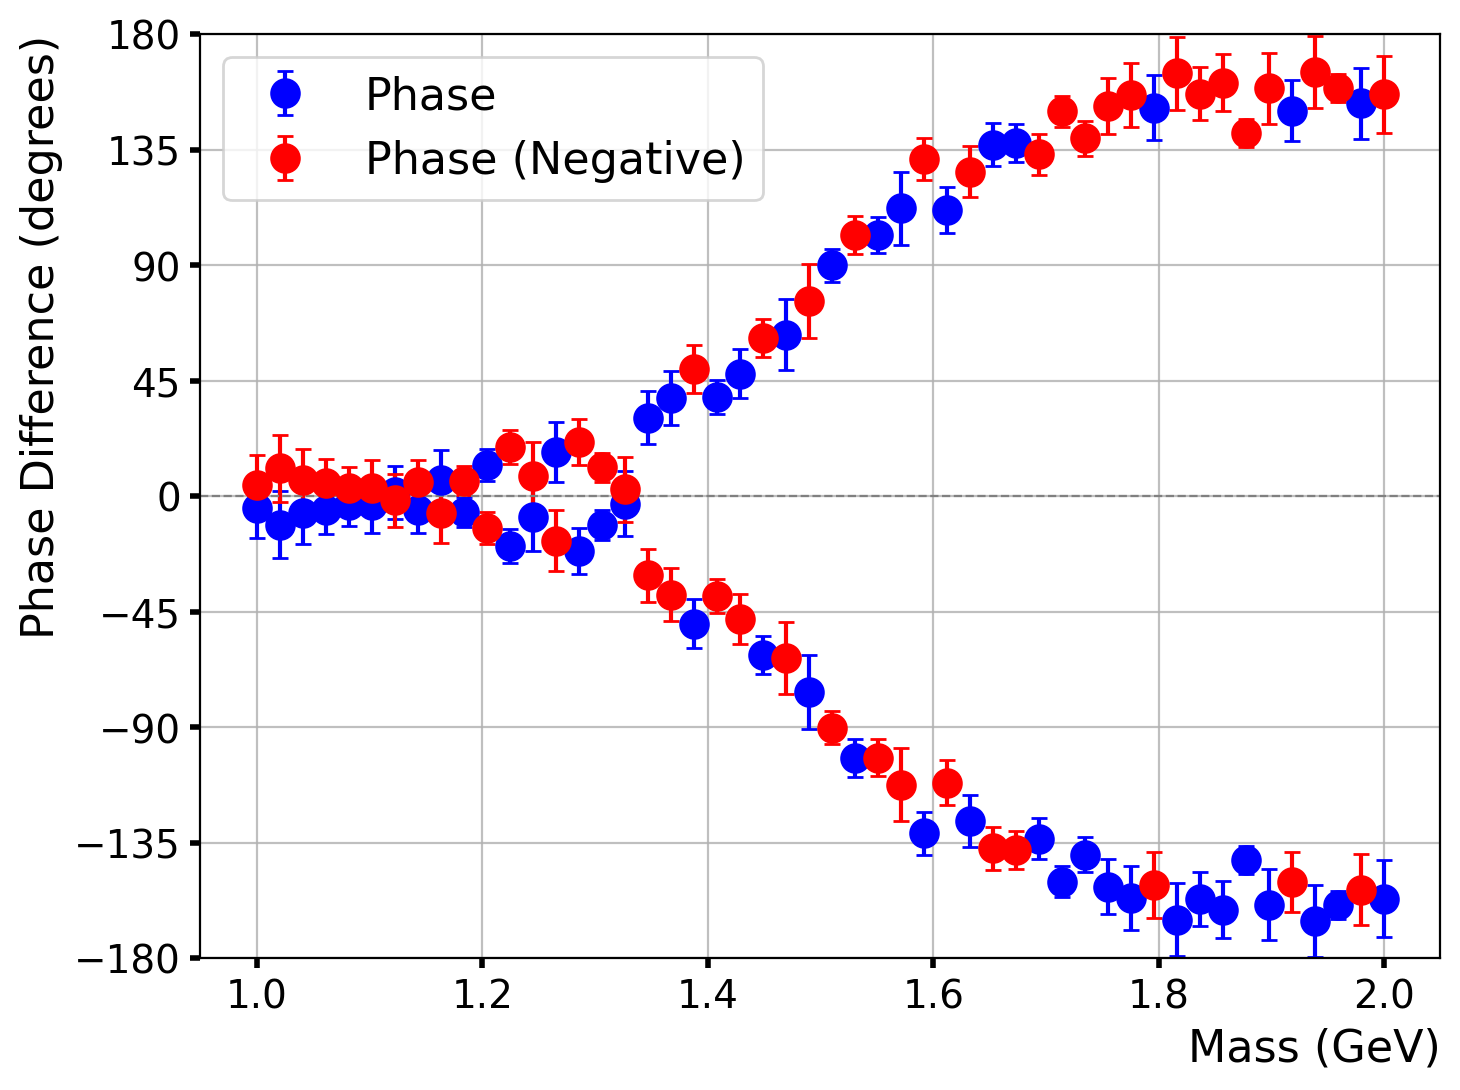

In [6]:
# Generate mass values
mass = np.linspace(1.0, 2.0, 50)  # Mass range from 0.5 to 2.0 GeV

# Generate phase values
true_phase = 160 / (1 + np.exp(-10 * (mass - 1.5)))  # Sigmoid transition from 0 to 160 degrees
noise = np.random.normal(0, 8, size=mass.shape)  # Gaussian noise with std dev of 5 degrees
measured_phase = true_phase + noise

# Randomly flip the sign of measured_phase
flip_sign = np.random.choice([-1, 1], size=measured_phase.shape)
measured_phase *= flip_sign

# Generate error bars
error = np.random.uniform(5, 15, size=mass.shape)

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mass, measured_phase, yerr=error, fmt='o', label='Phase', capsize=3, color='blue')
plt.errorbar(mass, -measured_phase, yerr=error, fmt='o', label='Phase (Negative)', capsize=3, color='red')

# Add labels and legend
plt.xlabel('Mass (GeV)', loc="right")
plt.ylabel('Phase Difference (degrees)', loc="top")
plt.ylim(-180, 180)
plt.yticks(np.arange(-180, 181, 45))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Below we'll have a quick example of why you should sometimes include beyond 180 degrees in your plots, and why a simple shift may not be the best idea

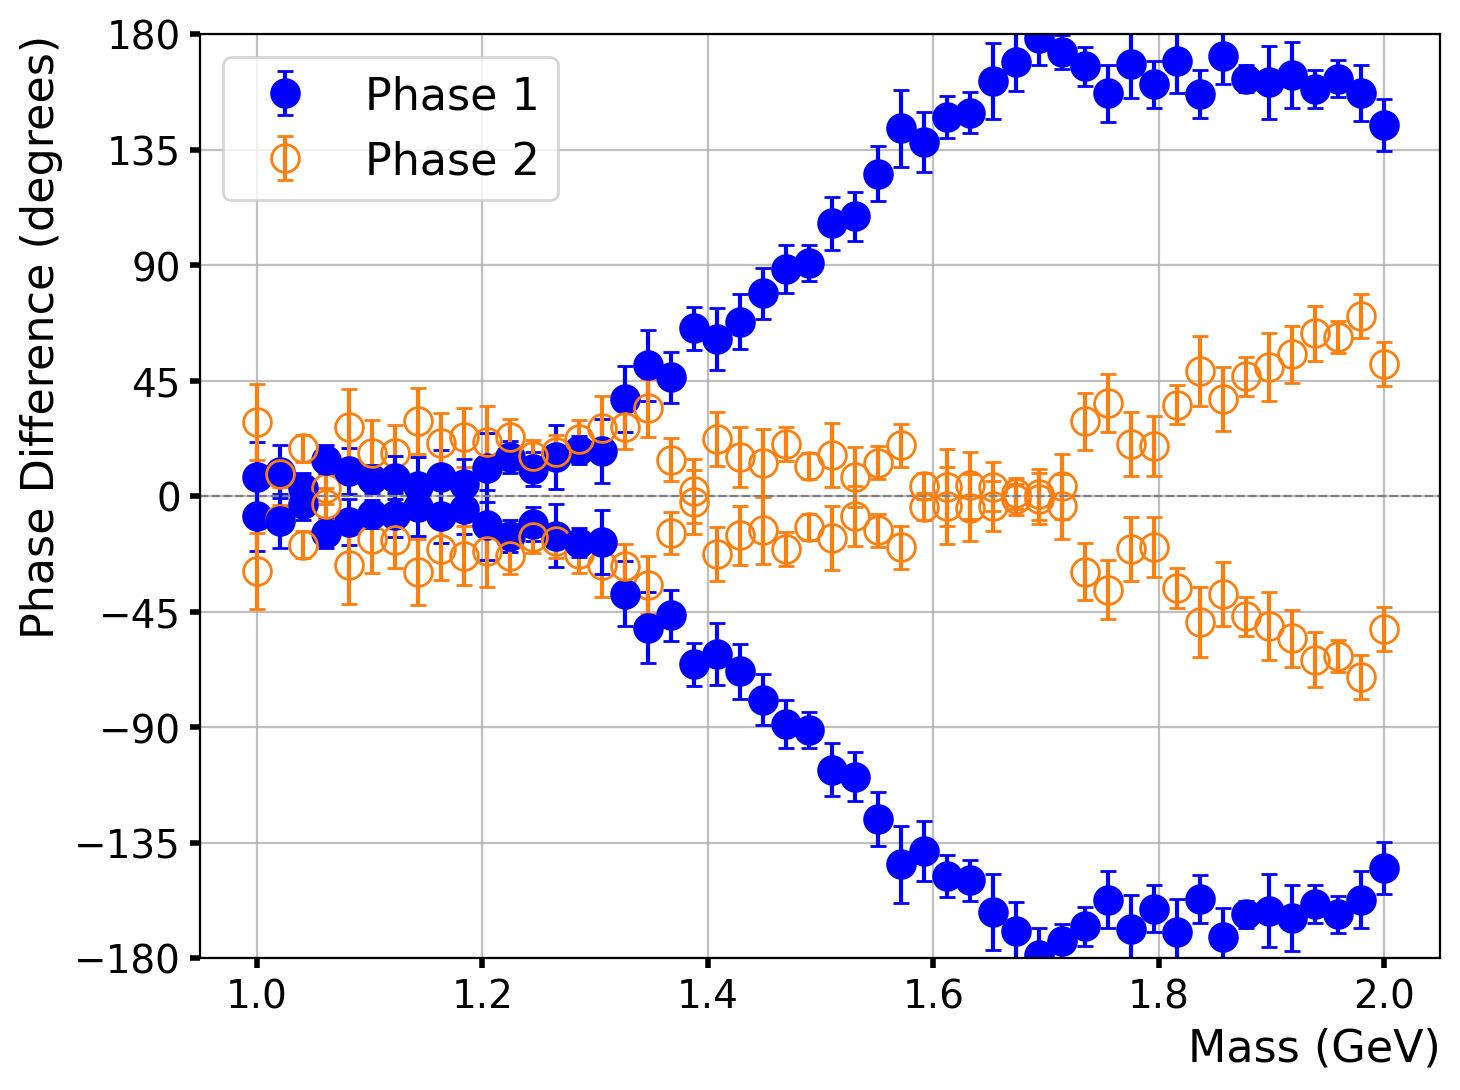

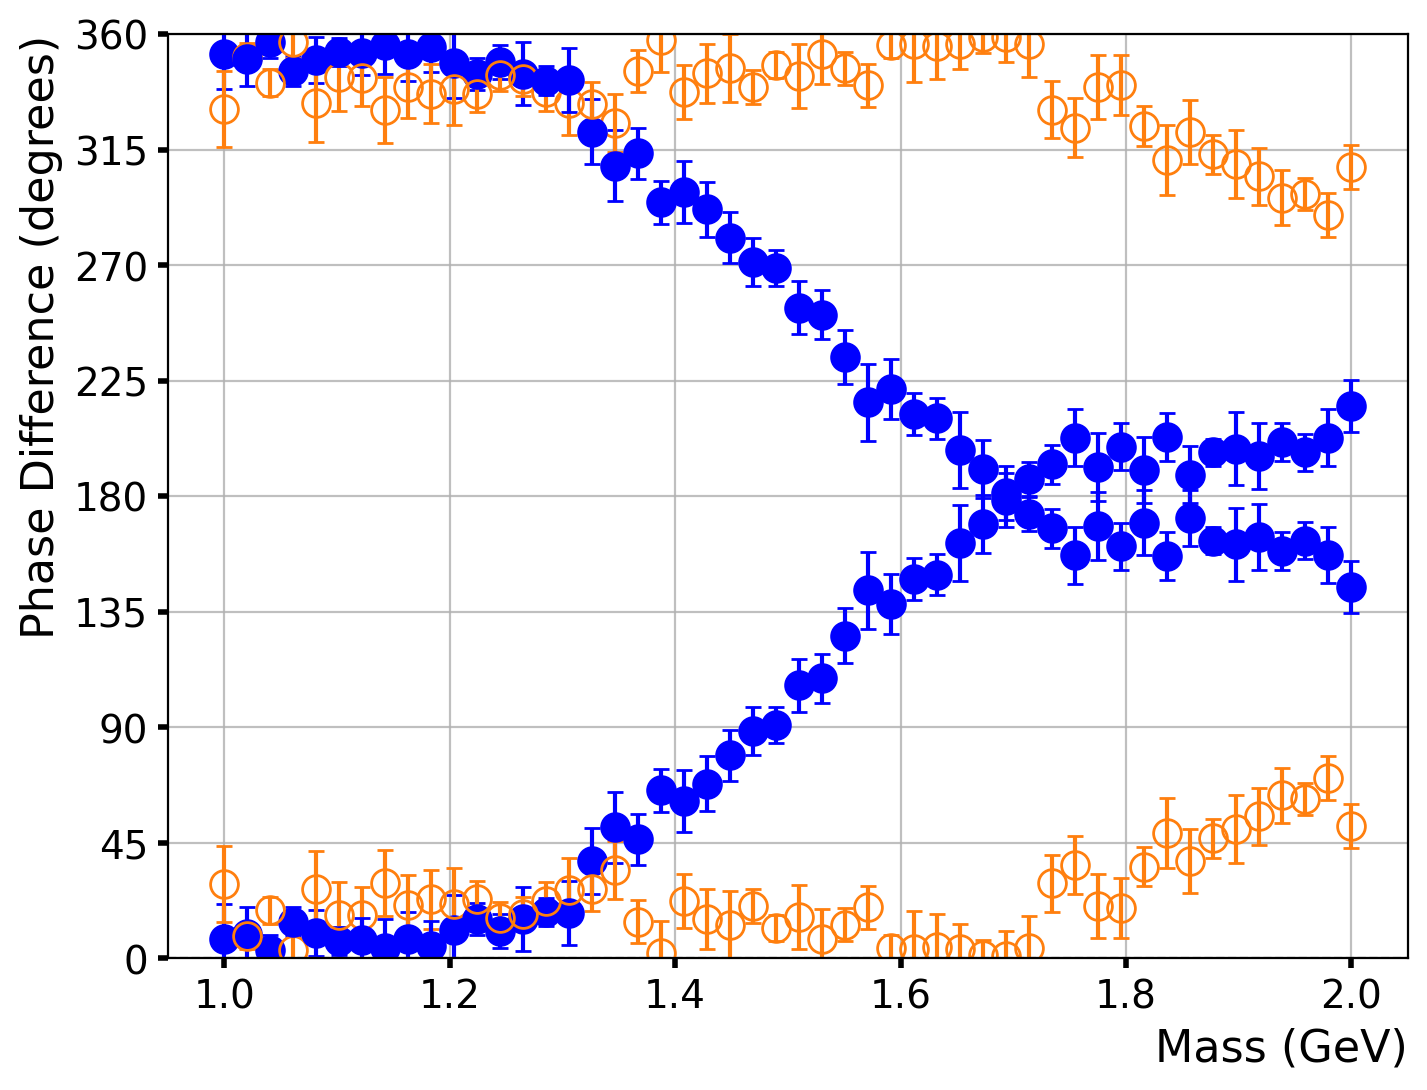

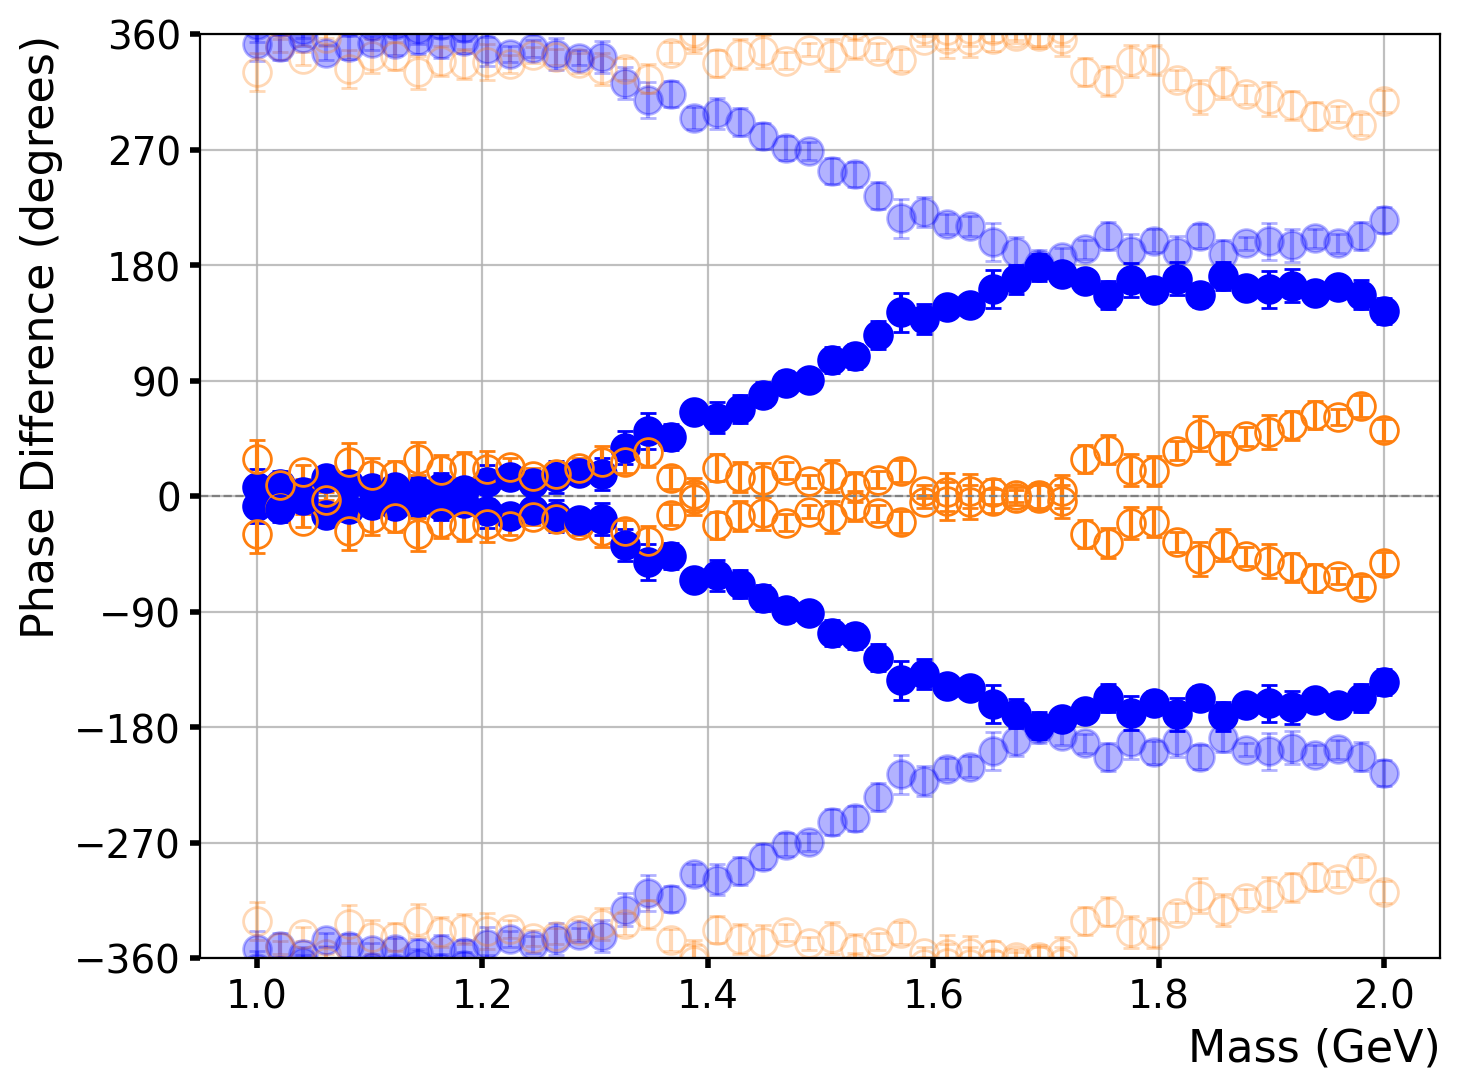

In [7]:
# FIRST we'll make a plot of two phase differences, where one goes beyond the -pi to pi region

# Generate mass values
mass = np.linspace(1.0, 2.0, 50)  # Mass range from 0.5 to 2.0 GeV

# Generate phase values
phase1 = 200 / (1 + np.exp(-10 * (mass - 1.5)))  # Sigmoid transition from 0 to 200 degrees
phase2 = 100 / (1 + np.exp(-10 * (mass - 1.8))) - 20  # Sigmoid transition starting at -20 degrees

# Randomly flip the sign of the phases to simulate ambiguity
flip_sign1 = np.random.choice([-1, 1], size=phase1.shape)
phase1 *= flip_sign1
flip_sign2 = np.random.choice([-1, 1], size=phase2.shape)
phase2 *= flip_sign2

# Add Gaussian noise to the phases to simulate measurement errors
noise = np.random.normal(0, 8, size=mass.shape)  # Gaussian noise with std dev of 5 degrees
measured_phase1 = phase1 + noise
measured_phase2 = phase2 + noise

# create negative versions of the phases due to sign ambiguity
negative_measured_phase1 = -measured_phase1
negative_measured_phase2 = -measured_phase2

# Wrap the phases from -pi to pi
measured_phase1_pi = (measured_phase1 + 180) % 360 - 180
measured_phase2_pi = (measured_phase2 + 180) % 360 - 180
negative_measured_phase1_pi = (negative_measured_phase1 + 180) % 360 - 180
negative_measured_phase2_pi = (negative_measured_phase2 + 180) % 360 - 180

# Generate error bars
error1 = np.random.uniform(5, 15, size=mass.shape)
error2 = np.random.uniform(5, 15, size=mass.shape)

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mass, measured_phase1_pi, yerr=error1, fmt='o', label='Phase 1', capsize=3, color='blue')
plt.errorbar(mass, measured_phase2_pi, yerr=error2, fmt='o', label='Phase 2', capsize=3, color='#ff7f0e', markerfacecolor='none')
plt.errorbar(mass, negative_measured_phase1_pi, yerr=error1, fmt='o', capsize=3, color='blue')
plt.errorbar(mass, negative_measured_phase2_pi, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none')

# Add labels and legend
plt.xlabel('Mass (GeV)', loc="right")
plt.ylabel('Phase Difference (degrees)', loc="top")
plt.ylim(-180, 180)
plt.yticks(np.arange(-180, 181, 45))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


# SECOND we make the same plot, but shifted to be in the 0 to 2pi region and the phases wrapped into the 0 to 2pi region
# this shows the issue of shifting the plot boundaries, as you'll have difficulty maintaining consistency 

# Wrap the phases from 0 to 2pi
measured_phase1_2pi = measured_phase1 % 360
measured_phase2_2pi = measured_phase2 % 360
negative_measured_phase1_2pi = negative_measured_phase1 % 360
negative_measured_phase2_2pi = negative_measured_phase2 % 360

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mass, measured_phase1_2pi, yerr=error1, fmt='o', label='Phase 1', capsize=3, color='blue')
plt.errorbar(mass, measured_phase2_2pi, yerr=error2, fmt='o', label='Phase 2', capsize=3, color='#ff7f0e', markerfacecolor='none')
plt.errorbar(mass, negative_measured_phase1_2pi, yerr=error1, fmt='o', capsize=3, color='blue')
plt.errorbar(mass, negative_measured_phase2_2pi, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none')

# Add labels and legend
plt.xlabel('Mass (GeV)', loc="right")
plt.ylabel('Phase Difference (degrees)', loc="top")
plt.ylim(0, 360)
plt.yticks(np.arange(0, 361, 45))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)

# Show the plot
plt.show()

# Lastly we'll show the same plot, but with the phase differences wrapped into the -pi to pi region
# but now the +/- 2pi ambiguity is shown and the plot is from -2pi to 2pi, to show the a fuller range of phase motion

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mass, measured_phase1_pi, yerr=error1, fmt='o', label='Phase 1', capsize=3, color='blue')
plt.errorbar(mass, measured_phase2_pi, yerr=error2, fmt='o', label='Phase 2', capsize=3, color='#ff7f0e', markerfacecolor='none')
plt.errorbar(mass, negative_measured_phase1_pi, yerr=error1, fmt='o', capsize=3, color='blue')
plt.errorbar(mass, negative_measured_phase2_pi, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none')

plt.errorbar(mass, measured_phase1_pi + 360, yerr=error1, fmt='o', capsize=3, color='blue', alpha=0.3)
plt.errorbar(mass, measured_phase2_pi + 360, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none', alpha=0.3)
plt.errorbar(mass, negative_measured_phase1_pi + 360, yerr=error1, fmt='o', capsize=3, color='blue', alpha=0.3)
plt.errorbar(mass, negative_measured_phase2_pi + 360, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none', alpha=0.3)

plt.errorbar(mass, measured_phase1_pi - 360, yerr=error1, fmt='o', capsize=3, color='blue', alpha=0.3)
plt.errorbar(mass, measured_phase2_pi - 360, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none', alpha=0.3)
plt.errorbar(mass, negative_measured_phase1_pi - 360, yerr=error1, fmt='o', capsize=3, color='blue', alpha=0.3)
plt.errorbar(mass, negative_measured_phase2_pi - 360, yerr=error2, fmt='o', capsize=3, color='#ff7f0e', markerfacecolor='none', alpha=0.3)

# Add labels and legend
plt.xlabel('Mass (GeV)', loc="right")
plt.ylabel('Phase Difference (degrees)', loc="top")
plt.ylim(-360, 360)
plt.yticks(np.arange(-360, 361, 90))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)

# Show the plot
plt.show()

Make a similar plot but it crosses the pi boundary early, and show how the -2pi to 2pi bound is beneficial

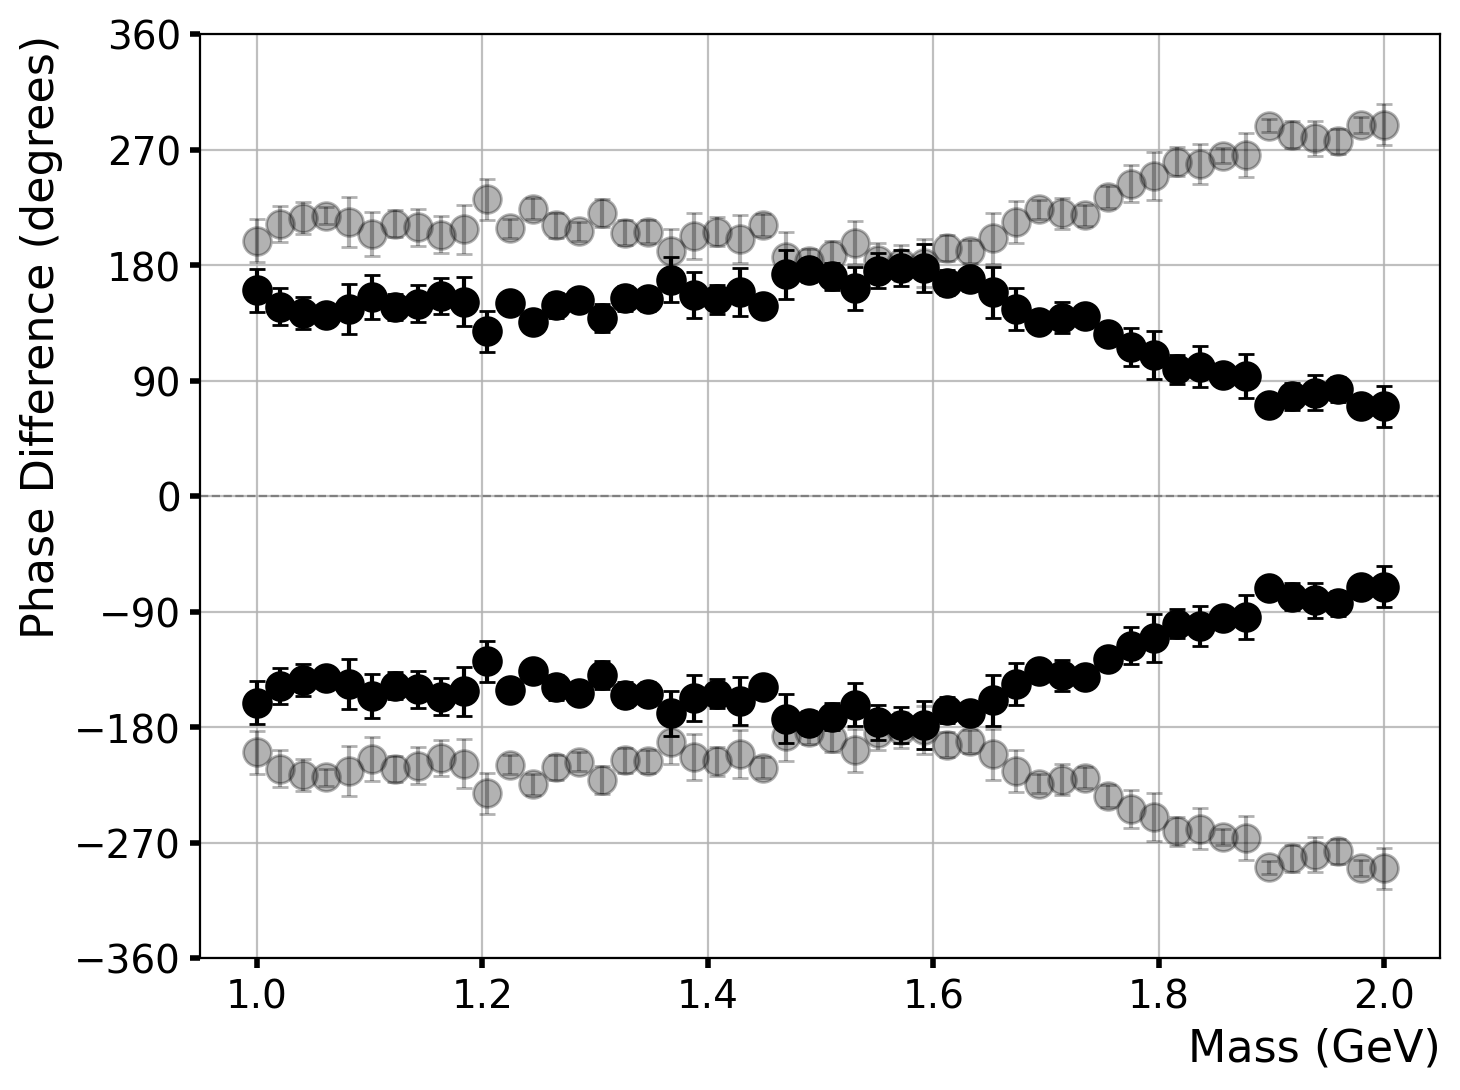

In [8]:
# Generate mass values
mass = np.linspace(1.0, 2.0, 50)  # Mass range from 0.5 to 2.0 GeV

# Generate phase values
phase = 140 / (1 + np.exp(-10 * (mass - 1.7))) + 150  # Sigmoid transition from 150 to 140 degrees

# Randomly flip the sign of the phases to simulate ambiguity
flip_sign = np.random.choice([-1, 1], size=phase.shape)
phase *= flip_sign

# Add Gaussian noise to the phases to simulate measurement errors
noise = np.random.normal(0, 8, size=mass.shape)  # Gaussian noise with std dev of 5 degrees
measured_phase = phase + noise

# create negative versions of the phases due to sign ambiguity
negative_measured_phase = -measured_phase

# Wrap the phases from -pi to pi
measured_phase_pi = (measured_phase + 180) % 360 - 180
negative_measured_phase_pi = (negative_measured_phase + 180) % 360 - 180

# Generate error bars
error1 = np.random.uniform(5, 20, size=mass.shape)

# Plot the data
plt.figure(figsize=(8, 6))
plt.errorbar(mass, measured_phase_pi, yerr=error1, fmt='o', label='Phase', capsize=3, color='black')
plt.errorbar(mass, negative_measured_phase_pi, yerr=error1, fmt='o', capsize=3, color='black')

plt.errorbar(mass, measured_phase_pi + 360, yerr=error1, fmt='o', label='Phase', capsize=3, color='black', alpha=0.3)
plt.errorbar(mass, negative_measured_phase_pi + 360, yerr=error1, fmt='o', capsize=3, color='black', alpha=0.3)
plt.errorbar(mass, measured_phase_pi - 360, yerr=error1, fmt='o', capsize=3, color='black', alpha=0.3) 
plt.errorbar(mass, negative_measured_phase_pi - 360, yerr=error1, fmt='o', capsize=3, color='black', alpha=0.3)


# Add labels and legend
plt.xlabel('Mass (GeV)', loc="right")
plt.ylabel('Phase Difference (degrees)', loc="top")
plt.ylim(-360, 360)
plt.yticks(np.arange(-360, 361, 90))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)

# Show the plot
plt.show()